# Análisis estadístico exploratorio

In [2]:
"""
    Import modules
"""
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import numpy as np

In [3]:
"""
    Declare constants
"""
CSV_PATH = "../data/raw/airbnb.csv"
FIGURES_FOLDER = "../reports/figures/exploratory_analisys/"

In [4]:
raw_df = pd.read_csv(CSV_PATH)
print("En total hay {} celdas con valores NaN y {} celdas con valores null.".format(raw_df.isna().sum().sum(), raw_df.isnull().sum().sum()))
raw_df.head()

En total hay 0 celdas con valores NaN y 0 celdas con valores null.


neighbourhood_group  neighbourhood   latitude  longitude        room_type  price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365
0              Centro       Justicia  40.424715  -3.698638  Entire home/apt     49              28                 35               0.42                               1                99
1              Centro    Embajadores  40.413418  -3.706838  Entire home/apt     80               5                 18               0.30                               1               188
2   Moncloa - Aravaca      Argüelles  40.424920  -3.713446  Entire home/apt     40               2                 21               0.25                               9               195
3   Moncloa - Aravaca  Casa de Campo  40.431027  -3.724586  Entire home/apt     55               2                  3               0.13                               9               334
4              Latina       Cármenes  40.403410  -3.740842     Private room     16               2                 23               0.76                               2               250

#### Columnas categóricas
##### Room type
Se quiere predecir el campo *room_type* a partir del resto. Vemos si está desbalanceada:

Entire home/apt    7926
Private room       5203
Shared room         192
Name: room_type, dtype: int64


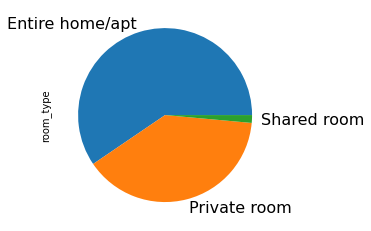

In [20]:
print(raw_df["room_type"].value_counts())
raw_df["room_type"].value_counts().plot(kind="pie", textprops={'fontsize': 16})
plt.savefig(FIGURES_FOLDER + "room_type_pie")

##### Neighbourhood y Neighbourhood group

Embajadores    1848
Universidad    1363
Name: neighbourhood, dtype: int64
Orcasitas    2
El Pardo     1
Name: neighbourhood, dtype: int64
... 126 filas


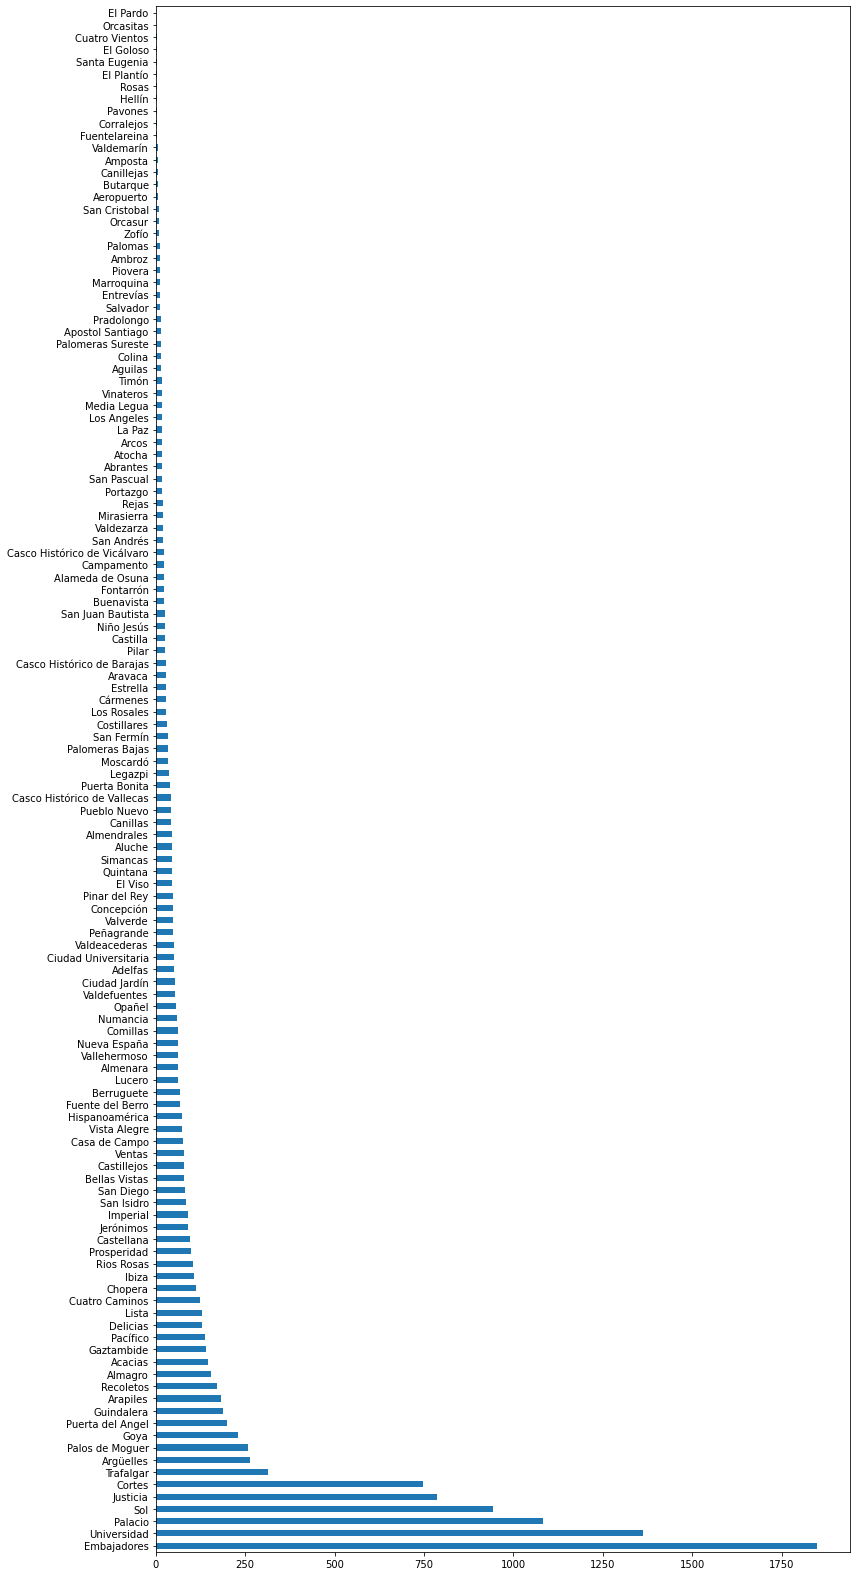

In [12]:
print(raw_df["neighbourhood"].value_counts().head(2))
print(raw_df["neighbourhood"].value_counts().tail(2))
print("... {} filas".format(len(raw_df["neighbourhood"].value_counts())))
raw_df["neighbourhood"].value_counts().plot(kind="barh", figsize=(12, 22))
plt.gcf().subplots_adjust(left=0.15)
plt.tight_layout()
plt.savefig(FIGURES_FOLDER + "neighbourhood_barh")

Centro        6773
Chamberí       960
Salamanca      883
Arganzuela     790
Tetuán         463
Name: neighbourhood_group, dtype: int64
... 21 filas


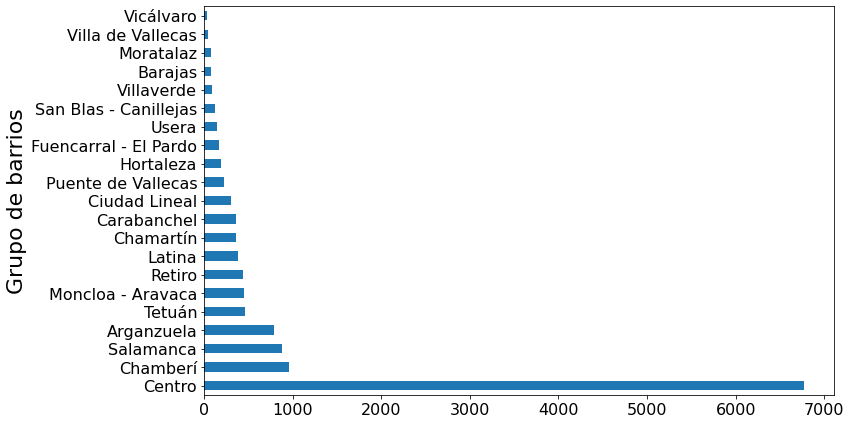

In [19]:
print(raw_df["neighbourhood_group"].value_counts().head())
print("... {} filas".format(len(raw_df["neighbourhood_group"].value_counts())))
raw_df["neighbourhood_group"].value_counts().plot(kind="barh", figsize=(12, 6))
plt.ylabel('Grupo de barrios', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gcf().subplots_adjust(left=0.55)
plt.tight_layout()
plt.savefig(FIGURES_FOLDER + "neighbourhood_group_barh")

#### Columnas numéricas

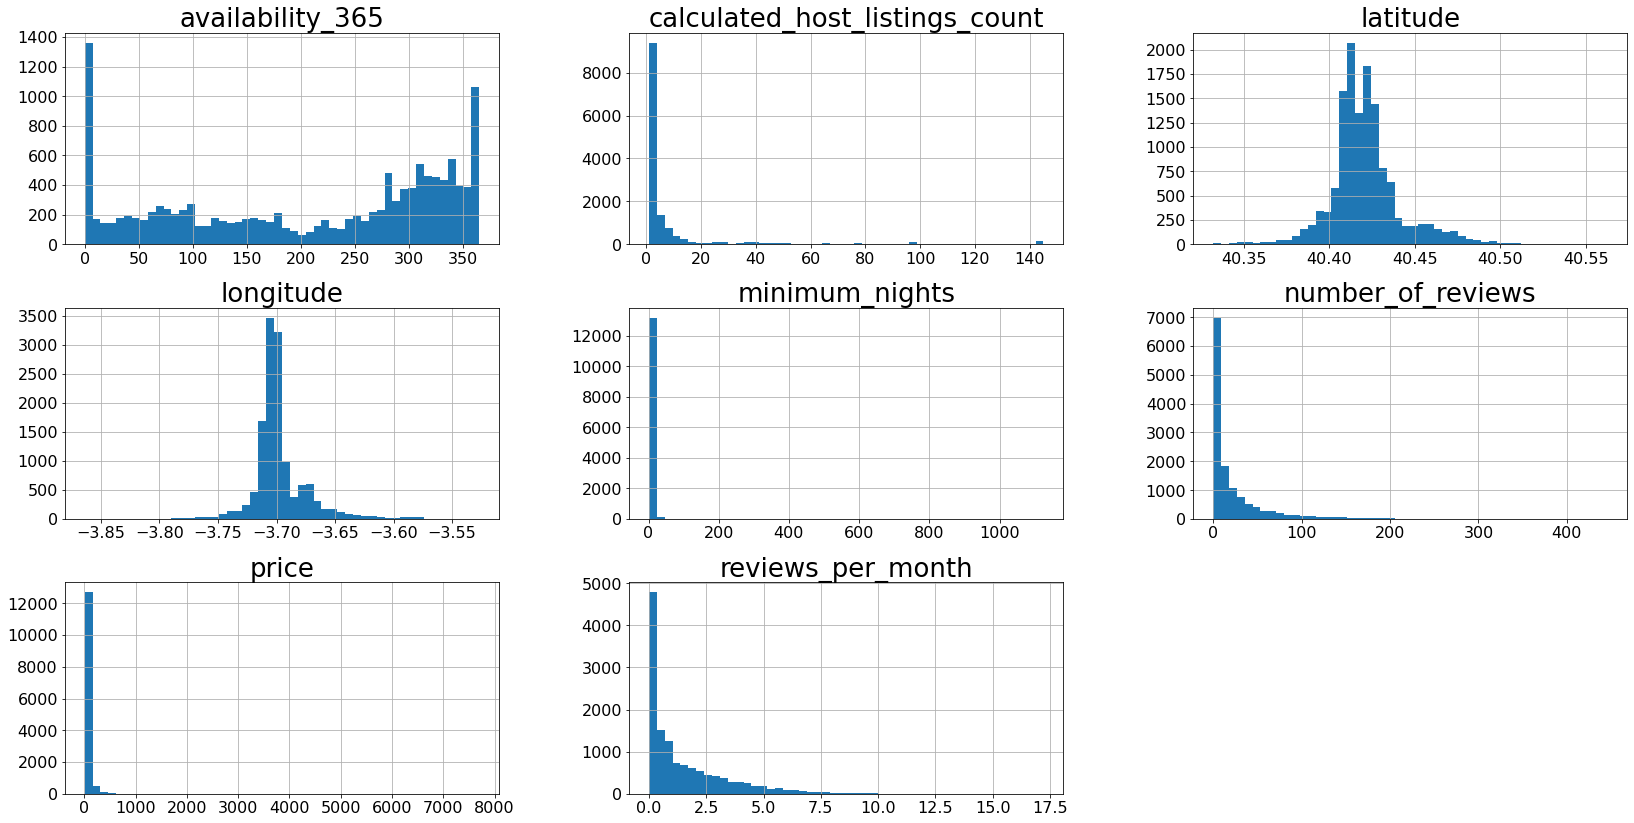

In [27]:
fig = raw_df.hist(figsize=(28, 14), bins=50)
[x.title.set_size(26) for x in fig.ravel()]
for ax in fig.ravel():
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)

plt.savefig(FIGURES_FOLDER + "all_numeric_hist")

##### Columnas numéricas desbalanceadas

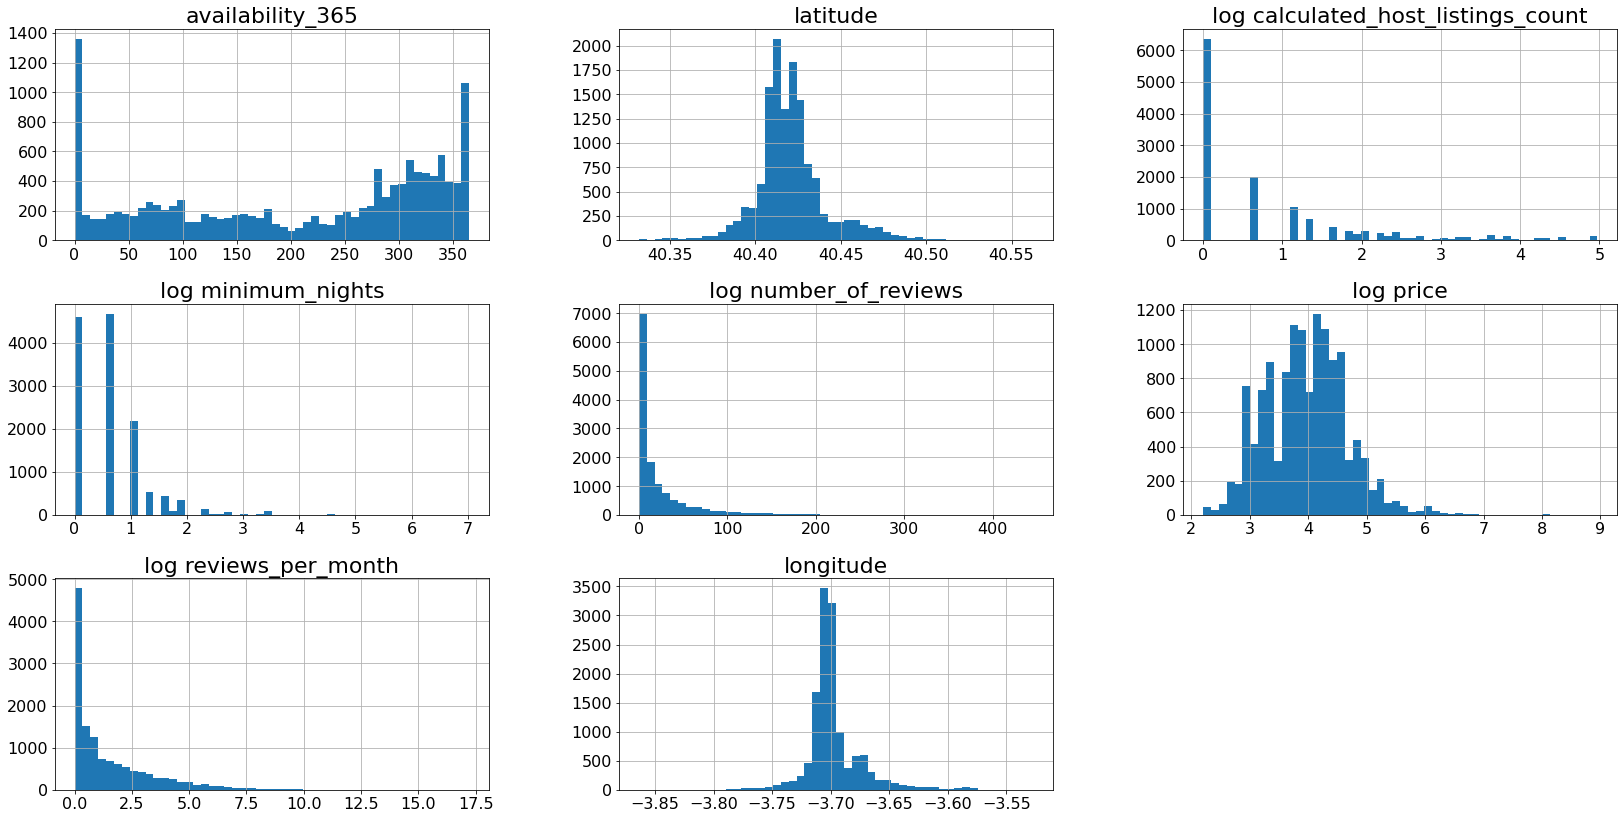

In [28]:
log_df = raw_df.copy()
log_df["price"] = np.log(raw_df["price"])
log_df["calculated_host_listings_count"] = np.log(raw_df["calculated_host_listings_count"])
log_df["minimum_nights"] = np.log(raw_df["minimum_nights"])
# log_df["number_of_reviews"] = np.log(raw_df["number_of_reviews"])
# log_df["reviews_per_month"] = np.log(raw_df["reviews_per_month"])
log_df = log_df.rename(columns={"price": "log price",
                      "calculated_host_listings_count":"log calculated_host_listings_count",
                      "minimum_nights":"log minimum_nights",
                      "number_of_reviews": "log number_of_reviews",
                      "reviews_per_month": "log reviews_per_month"})

fig = log_df.hist(figsize=(28, 14), bins=50)
[x.title.set_size(22) for x in fig.ravel()]
for ax in fig.ravel():
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
plt.savefig(FIGURES_FOLDER + "all_log_numeric_hist")